In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df = df.dropna()

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X = df.drop(columns=['Survived'])

In [9]:
y = df.Survived

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [12]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [14]:
np.mean(cross_val_score(clf, X,y, cv=100,scoring='accuracy'))

0.6264285714285713

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal',strategy='quantile')

In [17]:
trf = ColumnTransformer([('first',kbin_age, [0]),('second',kbin_fare,[1])])

In [18]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [19]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [20]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [21]:
trf.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])>

In [28]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [31]:
trf.named_transformers_.first.n_bins_

array([15])

In [48]:
output = pd.DataFrame({'age':X_train['Age'],
                      'age_trf':X_train_trf[:,0],
                      'fare':X_train['Fare'],
                       'fare_trf':X_train_trf[:,1]})

In [50]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [68]:
output['age_labels']  = pd.cut(X_train['Age'],
                               bins=trf.named_transformers_.first.bin_edges_[0].tolist())

output['fare_labels']  = pd.cut(X_train['Fare'],
                               bins=trf.named_transformers_.second.bin_edges_[0].tolist())

In [84]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
637,31.0,8.0,26.250,9.0,"(30.0, 32.0]","(26.0, 26.55]"
567,29.0,7.0,21.075,8.0,"(28.0, 30.0]","(18.75, 26.0]"
673,31.0,8.0,13.000,6.0,"(30.0, 32.0]","(10.5, 13.0]"
759,33.0,9.0,86.500,13.0,"(32.0, 35.0]","(76.292, 108.9]"
728,25.0,6.0,26.000,9.0,"(23.0, 25.0]","(18.75, 26.0]"


In [85]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [86]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [97]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345266040688575

In [124]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([('first',kbin_age, [0]),('second',kbin_fare,[1])])
    
    X_trf = trf.fit_transform(X)
    
    print('ACCURACY:',np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X.Age,color='pink')
    plt.title('Before Binning')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='lightgreen')
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'],color='pink')
    plt.title("Before Binning")
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='lightgreen')
    plt.show()
    
    

STRATEGY: uniform
ACCURACY: 0.6345266040688575


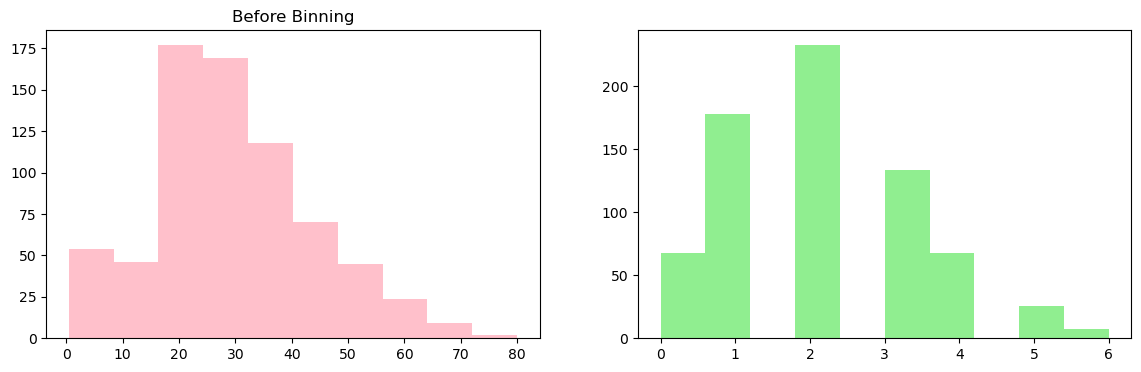

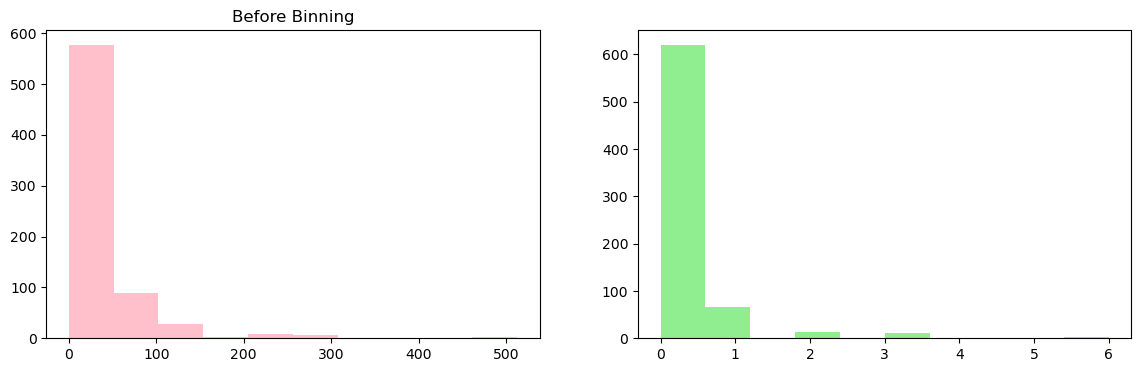

STRATEGY: quantile
ACCURACY: 0.6275430359937403


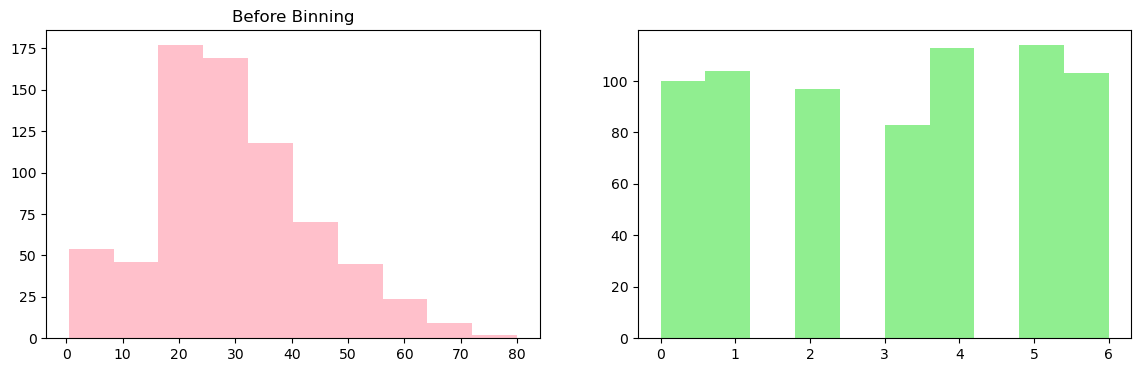

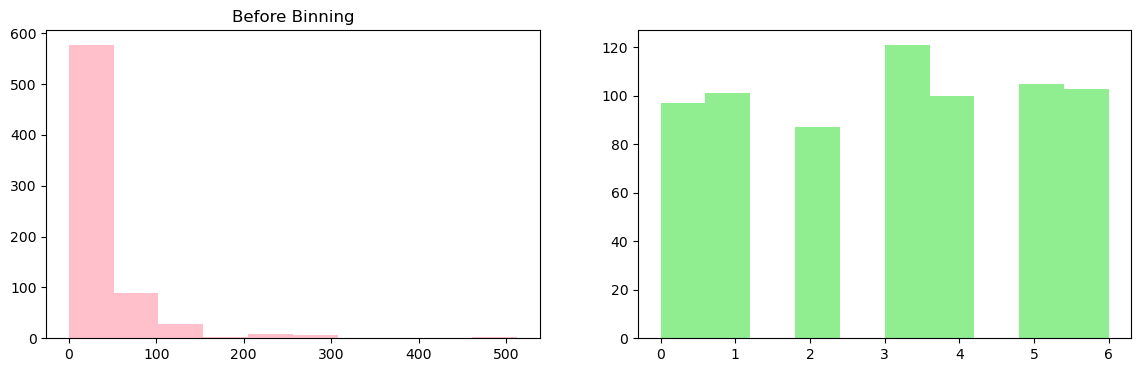

In [131]:
for strategy in ['uniform','quantile']:
    print('STRATEGY:',strategy)
    discretize(7,strategy)


# Binnarization

In [132]:
import numpy as np
import pandas as pd

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [136]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [137]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [138]:
df.dropna(inplace=True)

In [139]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [140]:
df['Family'] = df['SibSp']+df['Parch']

In [141]:
df.head()

,Age,Fare,SibSp,Parch,Survived,Family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [143]:
df = df.drop(['SibSp','Parch'],axis=1)

In [145]:
df.head()

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [147]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [148]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


### Without Binarization


In [149]:

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=  clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [155]:
np.median(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6319444444444444

In [157]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6485719874804381

### Applying Binarizer

In [159]:
from sklearn.preprocessing import Binarizer

In [160]:
trf = ColumnTransformer([('bin',Binarizer(),['Family'])],remainder='passthrough')

In [161]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [162]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [163]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6303990610328638

In [171]:
trf2 = ColumnTransformer([('bin',Binarizer(copy=False),['Family'])],remainder='passthrough')

X_train_trf2 = trf.fit_transform(X_train)
X_test_trf2 = trf.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_trf2,y_train)
y_pred2 = clf.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

X_trf2 = trf2.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf2,y,cv=10,scoring='accuracy'))

0.6205790297339593